# Bellcore data transference analisys

* Caio Everest - caioeverest@edu.unirio.br
* Cesar - cesar@edu.unirio.br

## imports

In [43]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from scipy.stats import poisson
from scipy.stats import uniform
from scipy.stats import norm

## read file and set columns identifiers

In [44]:
path_file = 'bellcore_data.csv'
df = pd.read_csv(path_file,header=None)
df.columns = ['Time', 'PackageSize']
df.describe()

,Time,PackageSize
count,13107.000000,13107.000000
mean,21.046862,657.022889
std,11.043100,586.662403
min,0.017716,64.000000
25%,11.290324,133.000000
50%,23.519164,174.000000
75%,30.037934,1090.000000
max,38.706900,1518.000000


## Package size

In [101]:
ps_mean = df['PackageSize'].mean()
ps_std = df['PackageSize'].std()
ps_mediam = df['PackageSize'].median()
ps_count = df['PackageSize'].size
ps_min = df['PackageSize'].min()
ps_max = df['PackageSize'].max()
ps_array = np.array(df['PackageSize'])

### Plot histogram of PackageSize

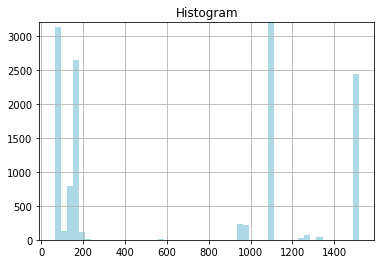

In [130]:
ps_hx, ps_hy, _ = plt.hist(ps_array, bins=50, color="lightblue")

plt.ylim(0.0,max(ps_hx)+0.05)
plt.title('Histogram')
plt.grid()

plt.show()
plt.close()

### Apply cumulative sum function 

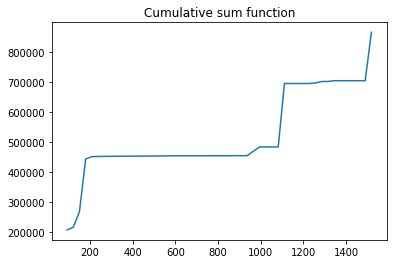

In [131]:
ps_dx = ps_hx[1] - ps_hy[0]
ps_cumsum = np.cumsum(ps_hx)*ps_dx

plt.plot(ps_hy[1:], ps_cumsum)

plt.title('Cumulative sum function')

plt.show()
plt.close()

### Normal

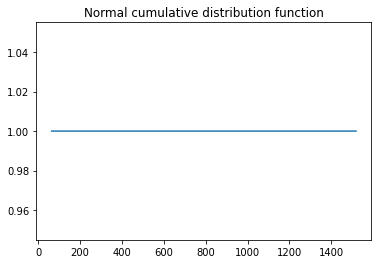

In [172]:
ps_x = np.linspace(ps_min,ps_max,ps_count)
#ps_y = norm.cdf(ps_array, ps_mean, ps_std)
ps_y = norm.cdf(ps_array)

plt.plot(ps_x, ps_y)

plt.title('Normal cumulative distribution function')

plt.show()
plt.close()

### Appling poisson

Text(0, 0.5, 'P(X=k)')

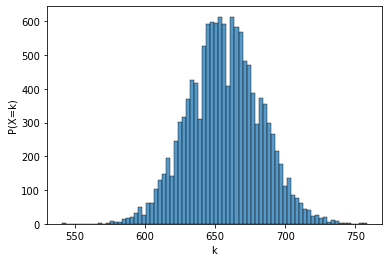

In [179]:
ps_poisson = poisson.rvs(mu=ps_mean, size=ps_count)
#ps_poisson = poisson.cdf(ps_array, ps_mean, ps_std)
sns.histplot(ps_poisson)
plt.xlabel('k')
plt.ylabel('P(X=k)')

## Time

In [140]:
tt_mean = df['Time'].mean()
tt_std = df['Time'].std()
tt_mediam = df['Time'].median()
tt_count = df['Time'].size
tt_min = df['Time'].min()
tt_max = df['Time'].max()
tt_array = np.array(df['Time'])

### Plot histogram of PackageSize

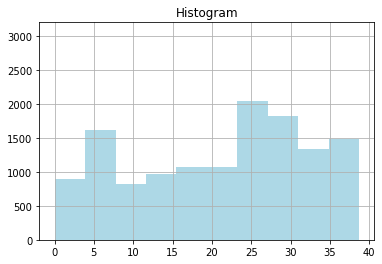

In [155]:
tt_hx, tt_hy, _ = plt.hist(tt_array, color="lightblue")

plt.ylim(0.0,max(ps_hx)+0.05)
plt.title('Histogram')
plt.grid()

plt.show()
plt.close()

### Apply cumulative sum function 

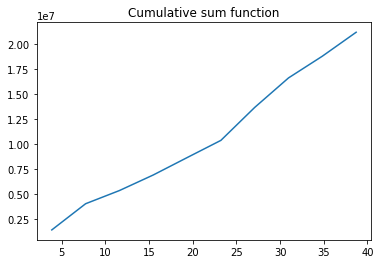

In [156]:
tt_dx = tt_hx[1] - tt_hy[0]
tt_cumsum = np.cumsum(tt_hx)*tt_dx

plt.plot(tt_hy[1:], tt_cumsum)

plt.title('Cumulative sum function')

plt.show()
plt.close()

### Sort 

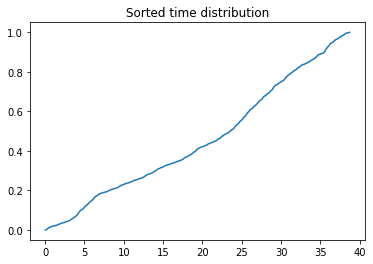

In [170]:
tt_array_sorted = np.sort(tt_array)
F2 = np.array(range(tt_count))/float(tt_count)

plt.plot(X2, F2)
plt.title('Sorted time distribution')

plt.show()
plt.close()

### Normal

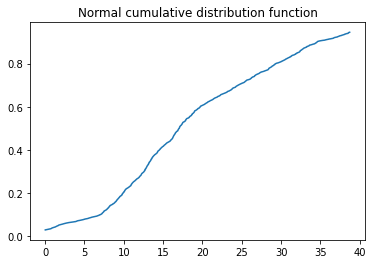

In [182]:
tt_x = np.linspace(tt_min,tt_max,tt_count)
tt_y = norm.cdf(tt_array_sorted, tt_mean, tt_std)
#tt_y = norm.cdf(tt_array_sorted)

plt.plot(tt_x, tt_y)

plt.title('Normal cumulative distribution function')

plt.show()
plt.close()

### Apply poisson comp

Text(0, 0.5, 'P(X=k)')

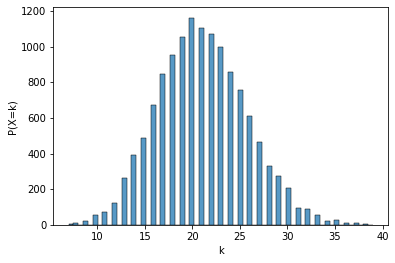

In [180]:
tt_poisson = poisson.rvs(mu=tt_mean, size=tt_count)
#tt_poisson = poisson.cdf(tt_array, tt_mean, tt_std)
sns.histplot(tt_poisson)
plt.xlabel('k')
plt.ylabel('P(X=k)')